In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# Load the dataset
data = pd.read_csv('/content/raw_sales.csv')

In [24]:
encoder = LabelEncoder()
# data['postcode'] = encoder.fit_transform(data['postcode'])
data['propertytype'] = encoder.fit_transform(data['propertyType'])

In [25]:
# Extract date and time (assuming separate columns, adjust if needed)
data["date"] = pd.to_datetime(data["datesold"].str.split(" ").str[0])
data["time"] = pd.to_datetime(data["datesold"].str.split(" ").str[1])

data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day
data["hour"] = data["time"].dt.hour
data["minute"] = data["time"].dt.minute

In [26]:
# Split the data into features (X) and target (y)
X = data[['year', 'month', 'day', 'postcode', 'bedrooms', 'price']]
y = data['propertytype']

In [27]:
unique_postal = X['postcode'].unique()
unique_postal

array([2607, 2906, 2905, 2606, 2902, 2612, 2904, 2615, 2914, 2602, 2600,
       2605, 2603, 2611, 2903, 2617, 2913, 2604, 2614, 2912, 2601, 2900,
       2620, 2618, 2616, 2911, 2609])

In [28]:
unique_bed = X['bedrooms'].unique()
unique_bed

array([4, 3, 5, 1, 2, 0])

In [29]:
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.concat([X, pd.DataFrame(encoder.fit_transform(X[["postcode"]]))], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
X_encoded

,year,month,day,postcode,bedrooms,price,0,1,2,3,...,17,18,19,20,21,22,23,24,25,26
0,2007,2,7,2607,4,525000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007,2,27,2906,3,290000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007,3,7,2905,3,328000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2007,3,9,2905,4,380000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2007,3,21,2906,3,310000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,2019,7,25,2900,3,500000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29576,2019,7,25,2612,2,560000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29577,2019,7,26,2912,2,464950,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29578,2019,7,26,2601,2,589000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_encoded = X_encoded.drop(columns=["postcode"], axis=1)

In [32]:
y

0        0
1        0
2        0
3        0
4        0
        ..
29575    1
29576    1
29577    1
29578    1
29579    1
Name: propertytype, Length: 29580, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Create and train machine learning models
models = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance'),
    "Support Vector Classification": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"\nPrecision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"\nConfusion Matrix for {name}:\n")
    print(confusion_matrix(y_test, y_pred))


Naive Bayes Performance:

Precision: 0.7018867924528301
Recall: 0.5574425574425574
F1-score: 0.6213808463251671

Confusion Matrix for Naive Bayes:

[[4678  237]
 [ 443  558]]

K-Nearest Neighbors Performance:

Precision: 0.7612137203166227
Recall: 0.5764235764235764
F1-score: 0.6560545764639

Confusion Matrix for K-Nearest Neighbors:

[[4734  181]
 [ 424  577]]

Support Vector Classification Performance:

Precision: 0.82
Recall: 0.2867132867132867
F1-score: 0.42487046632124353

Confusion Matrix for Support Vector Classification:

[[4852   63]
 [ 714  287]]

Decision Tree Performance:

Precision: 0.8237051792828686
Recall: 0.8261738261738262
F1-score: 0.8249376558603492

Confusion Matrix for Decision Tree:

[[4738  177]
 [ 174  827]]


In [36]:
import matplotlib.pyplot as plt

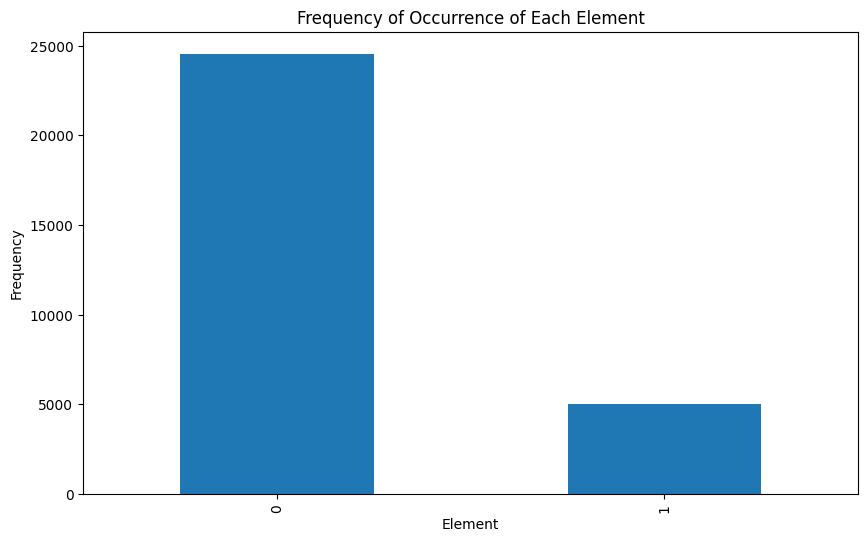

In [37]:
value_counts = y.value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Frequency of Occurrence of Each Element')
plt.xlabel('Element')
plt.ylabel('Frequency')
plt.show()